<a href="https://colab.research.google.com/github/van-richard/Machine_Learning_Tutorials/blob/main/Introduction_to_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#@title Overview { display-mode: "form" }
#@markdown 1. Linear Models
#@markdown  - Linear Regression
#@markdown 2. Nonlinear Models
#@markdown  - Sigmoid Function 
#@markdown  - Hyperbolic Tangent

!pip install mpl_interactions[jupyter] &> /dev/null
!pip install "ipywidgets>=7,<8" &> /dev/null
exit()
print('After you run this cell, the kernal will restart. You can move on to the next cell!')

After you run this cell, the kernal will restart. You can move on to the next cell!


In [1]:
#@title Install dependencies { display-mode: "form" }
!rm -r sample_data
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Neural Network Schematic

<p align="center"><img src="https://github.com/van-richard/Machine_Learning_Tutorials/raw/main/img/basic-neutral-network.png"
     style="float: left; margin-right: 10px;"
     img width="100%" /></p>

interactive(children=(IntSlider(value=1, description='m', max=5, min=-5), Output()), _dom_classes=('widget-int…

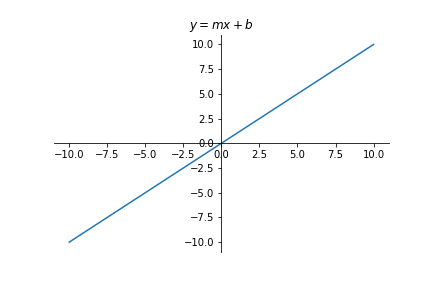

In [2]:
#@title Linear Regression { display-mode: "form" }

#@markdown \begin{equation}
#@markdown y = mx + b
#@markdown \tag{1}
#@markdown \end{equation}

#@markdown Linear regression assumes a straight line relationship between your input variable, _x_, to your output variable, _y_, where:
#@markdown - _m_ represents the slope of your line
#@markdown - _x_ represents some input variable
#@markdown - _b_ represents a constant which also intersects your y-axis

#@markdown As an example, we can plot this function, _m_ is can be a value in [-5,5], while leaving the _b_ as zero (0).

%matplotlib ipympl
from google.colab import output
output.enable_custom_widget_manager()

x = np.linspace(-10, 10, 100)

def f(x, m, b=0):
    return m * x + b

fig, ax = plt.subplots()
line, = ax.plot(x, f(x, m=1, b=0))

def update(m = 1):
    line.set_ydata(f(x,m,b=0))
    fig.canvas.draw_idle()
    
interact(update, m = (-5,5,1));

# Formating plot
ax.set_title('$y = mx + b$')
# Move left y-axis and bottim x-axis to centre, passing through (0,0)
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
# Eliminate upper and right axes
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')




Graphically, this equation, $y = 2x$, can be shown as our neuron for NN:
<br>

<p align="center"><img src="https://github.com/van-richard/Machine_Learning_Tutorials/raw/main/img/y_mx.png"
     style="float: left; margin-right: 10px;"
     img width="75%" /></p>

interactive(children=(IntSlider(value=1, description='m', max=5, min=-5), IntSlider(value=0, description='b', …

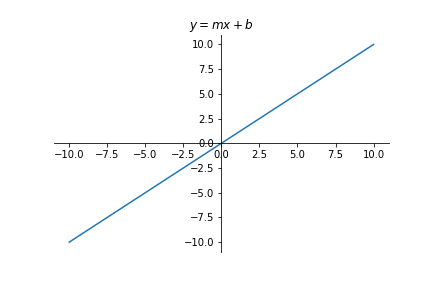

In [15]:
#@markdown If we include a value(s) of _b_, we get variations in the y-intersection.

%matplotlib ipympl
from google.colab import output
output.enable_custom_widget_manager()

x = np.linspace(-10, 10, 100)

def f(x, m, b):
    return m * x + b

fig, ax = plt.subplots()
line, = ax.plot(x, f(x, m=1, b=0))

def update(m = 1, b = 0):
    line.set_ydata(f(x,m,b))
    fig.canvas.draw_idle()
    
interact(update, m=(-5,5,1), b=(-5,5,1));

# Formating plot
ax.set_title('$y = mx + b$')
# Move left y-axis and bottim x-axis to centre, passing through (0,0)
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
# Eliminate upper and right axes
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

Including the _b_, the neuron would look like this:

<p align="center"><img src="https://github.com/van-richard/Machine_Learning_Tutorials/raw/main/img/y_mx_b.png"
     style="float: left; margin-right: 10px;"
     img width="75%" /></p>

\begin{equation*}
v_0 = w_1 x_1 + b
\tag{2}
\end{equation*}

Looking familiar yet? 

Equation 2 still represents a linear relationship, but it should be visually apparent how weights and biases affect the neuron for a single input (_x_).

So what does a neuron with two inputs look like? Equation 1 can be written as:

$$
y = m_1 x_1 + m_2 x_2 + b
$$

Therefore, equation 2 can be written as:

$$
v_0 = w_1 x_1 + w_2 x_2 + b
$$

This may seem familiar to those that have taken Linear Algebra.... Unfortunately.... I am not one of those people, so let's try and give ourselves a mental representation. Consider:

$$
y = -3x +2 \\
y = x + 2
$$

which, when graphed looks like the following. Adding the two equations gives us:

$$
y = -1x + 2
$$

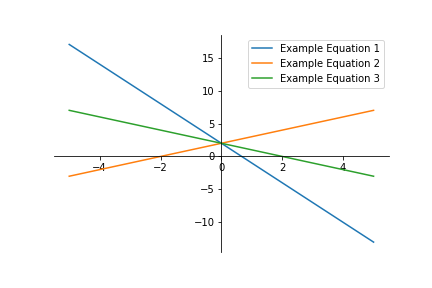

In [20]:
#@markdown Note that example equation 3 shows the average.

plt.close()

fig, ax = plt.subplots()

x = np.linspace(-5,5,20)

def linear_regression(x,m,b):
  return m * x + b

ax.plot(x, linear_regression(x, m=-3, b=2), label='Example Equation 1')
ax.plot(x, linear_regression(x, m=1, b=2), label='Example Equation 2')
ax.plot(x, linear_regression(x, m=-1, b=2), label='Example Equation 3')

# Move left y-axis and bottim x-axis to centre, passing through (0,0)
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
# Eliminate upper and right axes
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

plt.legend()

If we rearrange the equation further, where:

$$
v_0 = y \\
u_1 = w_1 x_1 \\
u_2 = w_2 x_2
$$

We get the relationship:

\begin{equation*}
v_0 = u_1 + u_2 = w_1 x_1 + w_2 x_2
\tag{3}
\end{equation*}

Visually this is:

<p align="center"><img src="https://github.com/van-richard/Machine_Learning_Tutorials/raw/main/img/node.png"
     style="float: left; margin-right: 10px;"
     img width="75%" /></p>

We can take this a step further, and have multiple inputs and express this in n-dimensions (rather than 2). In doing, so we get a very tedious expression of equation 3...

$$
v_0 = w_1 x_1 + w_2 x_2 + ... + w_n x_n \\
or \\
v_0 = u_1 + u_2 + ... + u_n
\tag{4}
$$

The shortcut notation of equations 4 can be written using summations, where _i_ is the number of inputs:

\begin{equation*}
v_0 = \sum_{i} u_i
\tag{5}
\end{equation*}